In [34]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import os

In [35]:
dataset_canada = pd.read_csv(os.path.join('datasets', 'CAvideos.csv'), encoding='latin1')
dataset_reino_unido = pd.read_csv(os.path.join('datasets', 'GBvideos.csv'), encoding='latin1')
dataset_estados_unidos = pd.read_csv(os.path.join('datasets', 'USvideos.csv'), encoding='latin1')

dataset_ingles = pd.concat([dataset_canada, dataset_reino_unido, dataset_estados_unidos], ignore_index=True)

In [36]:
dataset_mexico = pd.read_csv(os.path.join('datasets', 'MXvideos.csv'), encoding='latin1')

Grupo: negativo
Relação de likes/total: 0.9243348214391338
Relação de dislikes/total: 0.07566517856086613
------
Grupo: neutro
Relação de likes/total: 0.9508740239430082
Relação de dislikes/total: 0.04912597605699179
------
Grupo: positivo
Relação de likes/total: 0.962996054298299
Relação de dislikes/total: 0.03700394570170101
------
Grupo: negativo
Relação de likes/total: 0.9504740588609838
Relação de dislikes/total: 0.04952594113901622
------
Grupo: neutro
Relação de likes/total: 0.9545093149841194
Relação de dislikes/total: 0.045490685015880584
------
Grupo: positivo
Relação de likes/total: 0.9617657566638638
Relação de dislikes/total: 0.03823424333613626
------


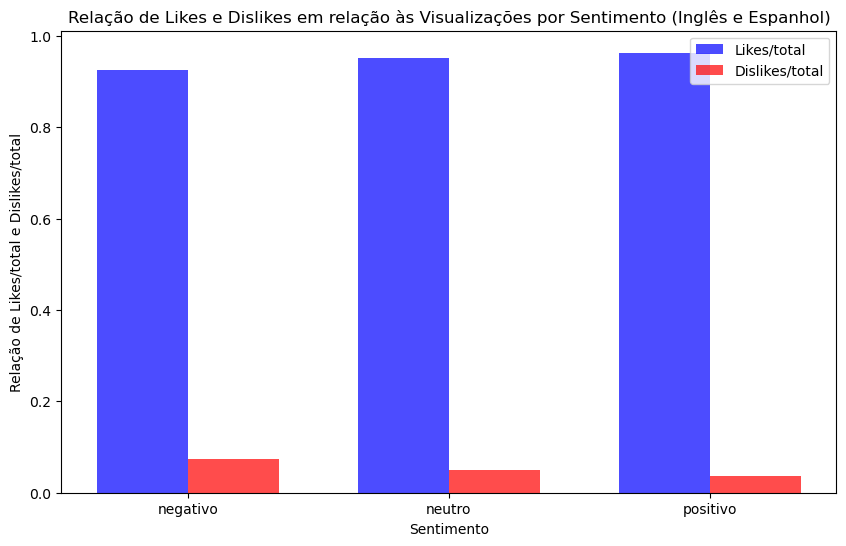

In [37]:
def analisar_sentimento(titulo):
    analysis = TextBlob(str(titulo))
    if analysis.sentiment.polarity > 0:
        return 'positivo'
    elif analysis.sentiment.polarity == 0:
        return 'neutro'
    else:
        return 'negativo'

def analisar_sentimentos_e_metricas(dataset):
    dataset['sentimento'] = dataset['title'].apply(analisar_sentimento)
    grupos = dataset.groupby('sentimento')

    nomes = []
    total_likes = {}
    total_dislikes = {}

    for nome, grupo in grupos:
        total_likes[nome] = grupo['likes'].sum()
        total_dislikes[nome] = grupo['dislikes'].sum()

        total = total_likes[nome] + total_dislikes[nome]

        ratio_likes = total_likes[nome] / total if total != 0 else 0
        ratio_dislikes = total_dislikes[nome] / total if total != 0 else 0

        nomes.append(nome)

        print(f"Grupo: {nome}")
        print(f"Relação de likes/total: {ratio_likes}")
        print(f"Relação de dislikes/total: {ratio_dislikes}")
        print("------")

    return nomes, total_likes, total_dislikes

nomes_ingles, total_likes_ingles, total_dislikes_ingles = analisar_sentimentos_e_metricas(dataset_ingles)

nomes_espanhol, total_likes_espanhol, total_dislikes_espanhol = analisar_sentimentos_e_metricas(dataset_mexico)

total_ratio_likes = [(total_likes_ingles[nome] + total_likes_espanhol.get(nome, 0)) / (total_likes_ingles[nome] + total_dislikes_ingles[nome] + total_likes_espanhol.get(nome, 0) + total_dislikes_espanhol.get(nome, 0)) for nome in nomes_ingles]
total_ratio_dislikes = [(total_dislikes_ingles[nome] + total_dislikes_espanhol.get(nome, 0)) / (total_likes_ingles[nome] + total_dislikes_ingles[nome] + total_likes_espanhol.get(nome, 0) + total_dislikes_espanhol.get(nome, 0)) for nome in nomes_ingles]

plt.figure(figsize=(10, 6))

barWidth = 0.35
r1 = np.arange(len(total_ratio_likes))
r2 = [x + barWidth for x in r1]

plt.bar(r1, total_ratio_likes, color='blue', width=barWidth, alpha=0.7, label='Likes/total')
plt.bar(r2, total_ratio_dislikes, color='red', width=barWidth, alpha=0.7, label='Dislikes/total')

plt.xlabel('Sentimento')
plt.ylabel('Relação de Likes/total e Dislikes/total')
plt.title('Relação de Likes e Dislikes em relação às Visualizações por Sentimento (Inglês e Espanhol)')
plt.xticks([r + barWidth / 2 for r in range(len(total_ratio_likes))], nomes_ingles)
plt.legend()
plt.show()


Grupo: negativo
Média de views: 3699720.849324161
------
Grupo: neutro
Média de views: 3408446.0405827407
------
Grupo: positivo
Média de views: 2050561.2026808118
------
Grupo: negativo
Média de views: 1096748.0174216027
------
Grupo: neutro
Média de views: 295414.4112614843
------
Grupo: positivo
Média de views: 627714.7382163445
------


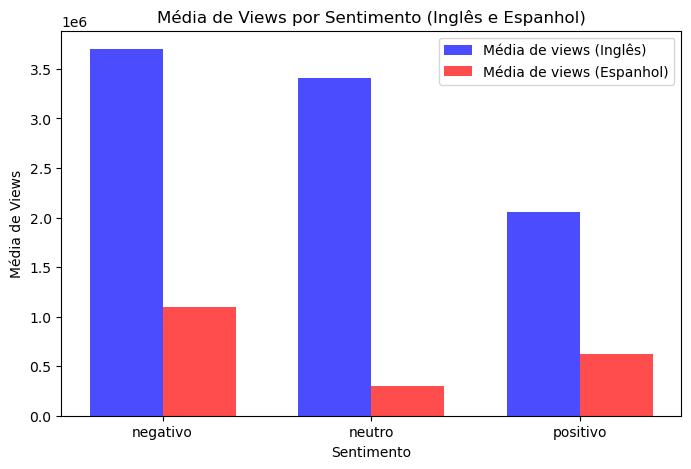

In [38]:
# análise de sentimentos e cálculo das métricas de views
def calcular_media_views(dataset):
    dataset['sentimento'] = dataset['title'].apply(analisar_sentimento)
    grupos = dataset.groupby('sentimento')

    nomes = []
    media_views = {}

    for nome, grupo in grupos:
        media_views[nome] = grupo['views'].mean()

        nomes.append(nome)

        print(f"Grupo: {nome}")
        print(f"Média de views: {media_views[nome]}")
        print("------")

    return nomes, media_views

nomes_ingles_views, media_views_ingles = calcular_media_views(dataset_ingles)

nomes_espanhol_views, media_views_espanhol = calcular_media_views(dataset_mexico)

plt.figure(figsize=(8, 5))

barWidth = 0.35
r1 = np.arange(len(media_views_ingles))
r2 = [x + barWidth for x in r1]

plt.bar(r1, list(media_views_ingles.values()), color='blue', width=barWidth, alpha=0.7, label='Média de views (Inglês)')
plt.bar(r2, list(media_views_espanhol.values()), color='red', width=barWidth, alpha=0.7, label='Média de views (Espanhol)')

plt.xlabel('Sentimento')
plt.ylabel('Média de Views')
plt.title('Média de Views por Sentimento (Inglês e Espanhol)')
plt.xticks([r + barWidth / 2 for r in range(len(media_views_ingles))], nomes_ingles_views)
plt.legend()
plt.show()


Grupo: negativo
Média de comentários: 10376.361272025102
------
Grupo: neutro
Média de comentários: 9736.118075139975
------
Grupo: positivo
Média de comentários: 5771.722707492932
------
Grupo: negativo
Média de comentários: 4939.998257839721
------
Grupo: neutro
Média de comentários: 1874.3465918468394
------
Grupo: positivo
Média de comentários: 2948.5157680569687
------


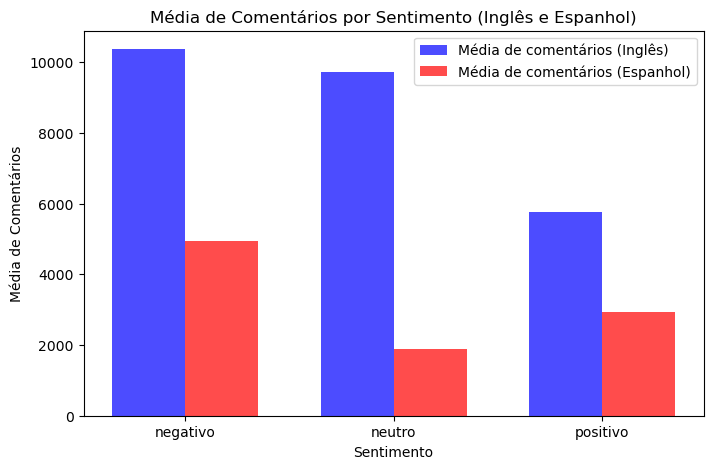

In [39]:
#análise de sentimentos e cálculo das métricas de comentários
def calcular_media_comentarios(dataset):
    dataset['sentimento'] = dataset['title'].apply(analisar_sentimento)
    grupos = dataset.groupby('sentimento')

    nomes = []
    media_comentarios = {}

    for nome, grupo in grupos:
        media_comentarios[nome] = grupo['comment_count'].mean()

        nomes.append(nome)

        print(f"Grupo: {nome}")
        print(f"Média de comentários: {media_comentarios[nome]}")
        print("------")

    return nomes, media_comentarios

nomes_ingles_comentarios, media_comentarios_ingles = calcular_media_comentarios(dataset_ingles)

nomes_espanhol_comentarios, media_comentarios_espanhol = calcular_media_comentarios(dataset_mexico)

plt.figure(figsize=(8, 5))

barWidth = 0.35
r1 = np.arange(len(media_comentarios_ingles))
r2 = [x + barWidth for x in r1]

plt.bar(r1, list(media_comentarios_ingles.values()), color='blue', width=barWidth, alpha=0.7, label='Média de comentários (Inglês)')
plt.bar(r2, list(media_comentarios_espanhol.values()), color='red', width=barWidth, alpha=0.7, label='Média de comentários (Espanhol)')

plt.xlabel('Sentimento')
plt.ylabel('Média de Comentários')
plt.title('Média de Comentários por Sentimento (Inglês e Espanhol)')
plt.xticks([r + barWidth / 2 for r in range(len(media_comentarios_ingles))], nomes_ingles_comentarios)
plt.legend()
plt.show()


In [40]:
#imprimir títulos aleatórios de cada categoria de sentimento
import random

def imprimir_titulos_aleatorios(dataset):
    dataset['sentimento'] = dataset['title'].apply(analisar_sentimento)
    grupos = dataset.groupby('sentimento')

    for nome, grupo in grupos:
        print(f"------ Títulos Aleatórios para Sentimento: {nome} ------")
        titulos_aleatorios = grupo.sample(n=5)['title']
        for titulo in titulos_aleatorios:
            print(titulo)
        print()

imprimir_titulos_aleatorios(dataset_ingles)

imprimir_titulos_aleatorios(dataset_mexico)


------ Títulos Aleatórios para Sentimento: negativo ------
Game Night Review - YMS
DRAKE & NINJA PLAY DUOS ON FORTNITE! | Fortnite Daily Funny and WTF Moments Ep. 115
GRAPEFRUIT PEEL STEAK Bistec de Toronja | HARD TIMES - recipes from times of food scarcity
Is McDonald's Garlic White Cheddar Burger Really That Bad?
The Kids Are Going Insane

------ Títulos Aleatórios para Sentimento: neutro ------
Charlie Puth (feat. Boyz II Men) - If You Leave Me Now (Studio Session)
Developing story: Van hits pedestrians in Toronto
Lil Durk feat. Lil Baby - How I Know Shot by @JerryPHD prod by @willafool
I WENT TO PIXAR ANIMATION STUDIOS!! (The Incredibles 2)
Post Malone, Ty Dolla $ign â Psycho (Lyrics) ðµ

------ Títulos Aleatórios para Sentimento: positivo ------
Gabru (FULL SONG) - Sidhu Moose Wala - Byg Byrd - New Punjabi Song 2018
Introducing: The Players! - Super Smash Bros. Invitational 2018
Westworld Season 2 | Official Super Bowl LII Ad | HBO
[OFFICIAL VIDEO] New Rules x Are You That Som